# Genetic algorithm with gym library
### In this experiment, we will try to do genetic algorithm for games: Lunar Lander and Frozen Lake. The first one is about landing with a rocket on moon using 3 engines. The second game is like a labyrinth. To do it we will use Pygad library

In [2]:
import gym
import numpy as np
import pygad

## Lunar Lander

### fitness function
it sums all rewards given from environment.
For each step, the reward:
- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.
### The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

In [75]:
def fitness_func(solution, solution_idx):
    total_reward = 0
    state = env.reset(seed=42)

    for action in solution:
        state, reward, done, info , _ = env.step(action.astype(int))
        total_reward += reward

        if done:
            break

    return total_reward

### gene space is 0, 1, 2 and 3. Each number is one of the engines or doing nothing (0).

In [86]:
gene_space = [0, 1, 2, 3]
# ile ruchów
num_genes = 200
# ile generacji
num_generations = 300
# ile gier na raz
sol_per_pop = 50
num_parents_mating = 25
keep_parents = 4
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 4

ga_instance = pygad.GA(gene_space=gene_space,
                       num_genes=num_genes,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       fitness_func=fitness_func,
                       stop_criteria="reach_200")


### Now we will launch our genetic algorithm and find the best results.

Wynik optymalizacji: 162.4277498860255


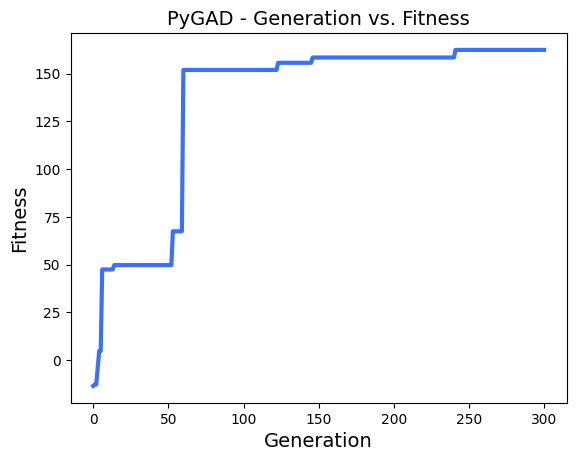

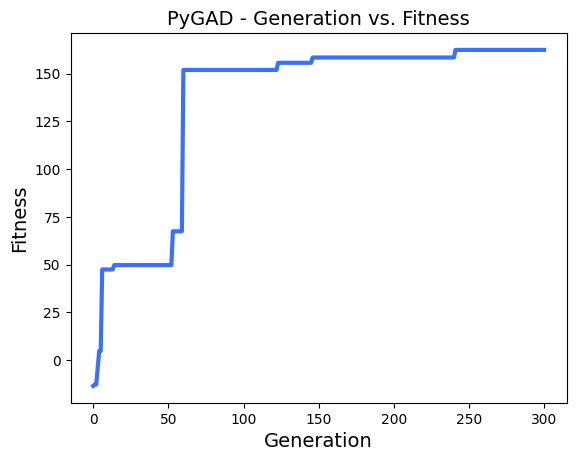

In [87]:
env = gym.make("LunarLander-v2")

ga_instance.run()

best_solution = ga_instance.best_solution()
best_fitness = best_solution[1]
best_solution = best_solution[0].astype(int)

# print("Najlepsze rozwiązanie:", best_solution)
print("Wynik optymalizacji:", best_fitness)
ga_instance.plot_fitness()

### Here we will display how the best solution looks in game

In [90]:
env = gym.make("LunarLander-v2", render_mode="human")

state = env.reset(seed=42)
best_solution = np.array(best_solution)
# print(best_solution[0])
# print(len(best_solution))

for i in range(len(best_solution)):
    # print(best_solution[i])
    action = best_solution[i]
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()

env.close()

[ 0.00449829  1.4247646   0.22032492  0.294843   -0.00285054 -0.00391279
  0.          0.        ]
[ 0.00669956  1.4307995   0.22032559  0.26821378 -0.00304622 -0.00391356
  0.          0.        ]
[ 0.00890093  1.4362341   0.22032633  0.24154283 -0.00324138 -0.00390372
  0.          0.        ]
[ 0.0111022   1.4410688   0.22032683  0.21487413 -0.00343652 -0.00390309
  0.          0.        ]
[ 0.01330347  1.4453034   0.2203274   0.18820575 -0.00363163 -0.0039025
  0.          0.        ]
[ 1.5408230e-02  1.4489379e+00  2.0820299e-01  1.6153096e-01
 -1.3956603e-03  4.4723533e-02  0.0000000e+00  0.0000000e+00]
[0.01744118 1.4519641  0.19922288 0.13449897 0.00263766 0.08067365
 0.         0.        ]
[0.01947412 1.4543905  0.19921082 0.10782952 0.0066701  0.08065601
 0.         0.        ]
[0.02150688 1.4562172  0.19919887 0.08115994 0.01070228 0.08065115
 0.         0.        ]
[0.02353945 1.457444   0.19918719 0.05449032 0.01473386 0.08063896
 0.         0.        ]
[0.02557192 1.45807

## Frozen Lake

### fitness function
it sums rewards given from environment: 
- +1 for reaching the gift
- +0 for anything else


additionally, we will count steps and the distance from player to gift. If the player reaches the gift we also add +19 so that the algorithm get 20 points for finishing game. 

In [65]:
def fitness_func(solution, solution_idx):
    total_reward = 0
    steps = 0
    state = env.reset(seed=42)

    for action in solution:
        steps += 1
        state, reward, terminated, truncated, _ = env.step(action.astype(int))
        total_reward += reward
        distance = (7 - (state//8)) + (7 - (state%8))
        if state == 63:
            total_reward += 19
            return total_reward-steps


        if terminated or truncated:
            break

    return total_reward-steps-distance

### Gene space is again 0, 1, 2 and 3 - this time those are moves up, down, right or left. Our algorithm will have only 30 moves (num_genes) as it is only 8x8 map.

In [70]:
gene_space = [0, 1, 2, 3]
# ile ruchów
num_genes = 30
# ile generacji
num_generations = 100
# ile gier na raz
sol_per_pop = 100
num_parents_mating = 50
keep_parents = 4
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 4

ga_instance = pygad.GA(gene_space=gene_space,
                       num_genes=num_genes,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       fitness_func=fitness_func,
                       stop_criteria="reach_6")


### Now we will launch this genetic algorithm and save best solution.

Wynik optymalizacji: 6.0


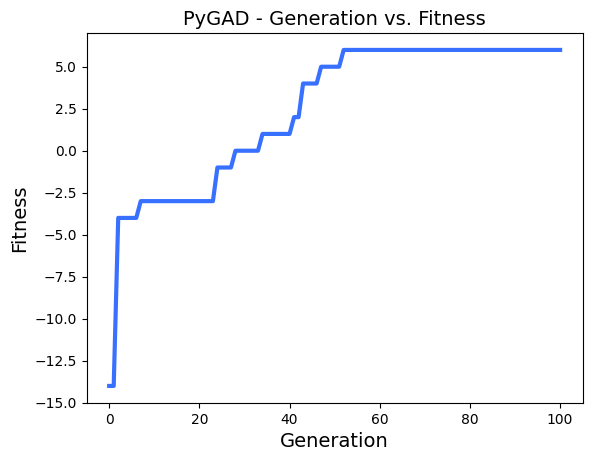

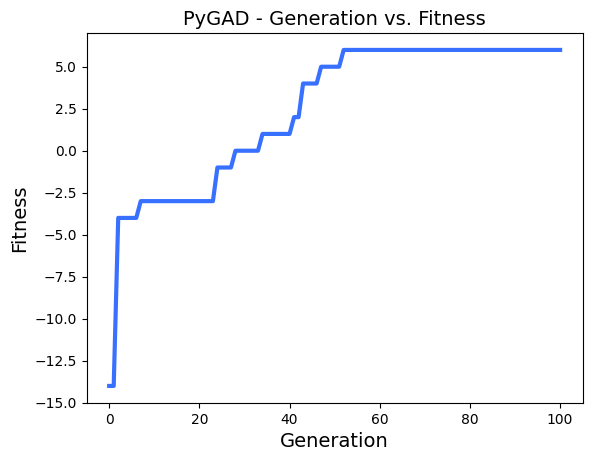

In [71]:
env = gym.make('FrozenLake8x8-v1', map_name="8x8", is_slippery=False)

ga_instance.run()

best_solution = ga_instance.best_solution()
best_fitness = best_solution[1]
best_solution = best_solution[0].astype(int)

# print("Najlepsze rozwiązanie:", best_solution)
print("Wynik optymalizacji:", best_fitness)
ga_instance.plot_fitness()

### Here we will display the best solution and show it in game.

In [72]:
env = gym.make('FrozenLake8x8-v1', map_name="8x8", is_slippery=False, render_mode="human")

state = env.reset(seed=42)
num_steps = 0
best_solution = np.array(best_solution)
# print(best_solution[0])
# print(len(best_solution))

for i in range(len(best_solution)):
    # print(best_solution[i])
    action = best_solution[i]
    observation, reward, terminated, truncated, info = env.step(action)
    
    if observation==63:
        break
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()